In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [2]:
# train and test data
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\model selection\train.csv')

In [3]:
train_data.shape

(76020, 371)

In [4]:
train_data.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
y=train_data.iloc[:,-1]
x=train_data.iloc[:,:-1]

In [6]:
# train_test split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
X_train.shape,X_test.shape

((60816, 370), (15204, 370))

# removing constant feature

In [8]:
constant_filter=VarianceThreshold(threshold=0)

In [9]:
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [10]:
constant_filter.get_support().sum()

336

In [11]:
# number of constant_feature
370-332

38

In [12]:
constant_list=[not temp for temp in constant_filter.get_support()]

In [13]:
X_train_filter=constant_filter.transform(X_train)

X_test_filter=constant_filter.transform(X_test)

In [14]:
X_train_filter.shape,X_test_filter.shape

((60816, 336), (15204, 336))

# QUASI CONSTANT FEATURE REMOVAL

In [15]:
qconst_filter=VarianceThreshold(threshold=.01)

In [16]:
qconst_filter.fit(X_test_filter)

VarianceThreshold(threshold=0.01)

In [17]:
X_train_quasi_filter=qconst_filter.transform(X_train_filter)

X_test_quasi_filter=qconst_filter.transform(X_test_filter)

In [18]:
X_train_quasi_filter.shape,X_test_quasi_filter.shape

((60816, 248), (15204, 248))

In [19]:
#number of quasi constant
332-252

80

# DUPLICATE FEATURE REMOVING

In [20]:
X_train_T=X_train_quasi_filter.T

X_test_T=X_test_quasi_filter.T

In [21]:
X_train_T=pd.DataFrame(X_train_T)

X_test_T=pd.DataFrame(X_test_T)

In [22]:
#number of duplicate feature
X_train_T.duplicated().sum()

14

In [23]:
duplicated_feature=X_train_T.duplicated()

In [24]:
feature_to_keep=[not index for index in duplicated_feature]

In [25]:
len(feature_to_keep)

248

In [26]:
X_train_unique=pd.DataFrame(X_train_T[feature_to_keep].T)

X_test_unique=pd.DataFrame(X_test_T[feature_to_keep].T)

In [27]:
X_train_unique.shape,X_test_unique.shape

((60816, 234), (15204, 234))

# removal corrlelated feature 

In [28]:
corrmat=X_train_unique.corr()

In [29]:
corrmat.shape

(234, 234)

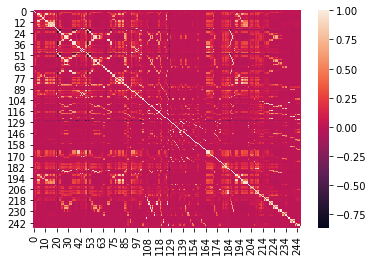

In [30]:
sns.heatmap(corrmat)

In [31]:
#filter out correlated feature

In [32]:
def get_correlation(data,threshold):
    corr_col=set()
    corrmat=data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]> threshold):
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col            

In [33]:
corr_feature=get_correlation(X_train_unique,.85)

In [34]:
corr_feature=list(corr_feature)

In [35]:
X_train_uncorr=X_train_unique.drop(corr_feature,axis=1)

X_test_uncorr=X_test_unique.drop(corr_feature,axis=1)

In [36]:
X_train_uncorr.shape,X_test_uncorr.shape

((60816, 128), (15204, 128))

In [37]:
#feature grouping and feature importance

In [38]:
corrdata=corrmat.abs().stack()

In [39]:
corrdata=corrdata.sort_values(ascending=False)

In [40]:
corrdata=corrdata[corrdata>.85]
corrdata=corrdata[corrdata<1]

In [41]:
corrdata

139  130    1.000000
140  131    1.000000
131  140    1.000000
130  139    1.000000
137  146    1.000000
              ...   
215  214    0.850925
80   191    0.850770
191  80     0.850770
167  41     0.850222
41   167    0.850222
Length: 432, dtype: float64

In [42]:
# groupling 
corrdata=pd.DataFrame(corrdata).reset_index()
corrdata.columns=['feature1','feature2','corr_values']

In [43]:
group_feature_list=[]
correlated_group_list=[]
for feature in corrdata.feature1.unique():
    if feature not in group_feature_list:
        correlated_block=corrdata[corrdata.feature1==feature]
        group_feature_list=group_feature_list + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_group_list.append(correlated_block)

In [44]:
type(correlated_group_list)

list

In [45]:
# slecting best performing faeture in each group

In [46]:
important_feature=[]
for group in correlated_group_list:
    feature=list(group.feature1.unique()) + list(group.feature2.unique())
    
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_unique[feature],y_train)
    importance=pd.concat([pd.Series(feature),pd.Series(rf.feature_importances_)],axis=1)
    importance.columns=['feature','importance']
    
    importance.sort_values(by='importance',ascending=False,inplace=True)
    feat=importance.iloc[0]
    important_feature.append(feat)

In [47]:
important_feature=pd.DataFrame(important_feature)

important_feature.reset_index(inplace=True ,drop=True)

In [48]:
feature_to_consider=set(important_feature['feature'])

feature_to_discard=set(corr_feature) - set(feature_to_consider)

feature_to_discard=list(feature_to_discard)

In [49]:
X_train_grouped_uncorr=X_train_unique.drop(labels=feature_to_discard,axis=1)

X_test_grouped_uncorr=X_test_unique.drop(labels=feature_to_discard,axis=1)

In [63]:
X_train_grouped_uncorr.shape ,X_test_grouped_uncorr.shape

((60816, 164), (15204, 164))

# build ML model and model performance

In [72]:
SelectPercentile

# basic methods

In [74]:
%%time
#removing constant feature
run_RandomForest(X_train_filter,X_test_filter,y_train,y_test)

accuracy of model: 0.9588923967377007
Wall time: 1min 15s


In [75]:
%%time
#removing constant feature
run_RandomForest(X_train_quasi_filter,X_test_quasi_filter,y_train,y_test)

accuracy of model: 0.9581689029202841
Wall time: 40.2 s


In [77]:
%%time
#removing constant feature
run_RandomForest(X_train_unique,X_test_unique,y_train,y_test)

accuracy of model: 0.9587608524072613
Wall time: 42.5 s



# pearsom corrleltion 

In [78]:
%%time
#removing constant feature
run_RandomForest(X_train_uncorr,X_test_uncorr,y_train,y_test)

accuracy of model: 0.9588266245724809
Wall time: 40.2 s


In [79]:
%%time
#removing constant feature
run_RandomForest(X_train_grouped_uncorr,X_test_grouped_uncorr,y_train,y_test)

accuracy of model: 0.9583004472507235
Wall time: 53 s
